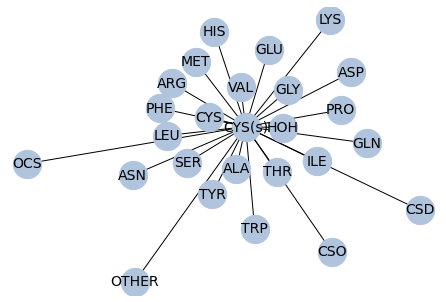

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import xlrd
import xml.etree.ElementTree as ET

file="../examples_inputfiles/Book2_python_NetworkSG.xlsx"
book=xlrd.open_workbook(file)

G = nx.Graph()

names=[]

### Importing data from excel 
book = xlrd.open_workbook(file)
sheet = book.sheet_by_index(0) ### 0-->CYS 1-->CSD 2-->CSO 3-->OCS 

## Assigning features/descriptors to nodes/edges
for row in range(sheet.nrows):
    data = sheet.row_slice(row)
    Amino1 = data[0].value
    CYS = data[1].value
    NeighborCYS= data[2].value

    G.add_node(Amino1, neighbor=NeighborCYS)
    names.append((Amino1, CYS, {'weight': NeighborCYS}))
    
G.add_edges_from(names)

nx.draw(G, with_labels='True', node_color='lightsteelblue', font_size=14, node_size=800)
#plt.show()
#plt.savefig('./CYS_neighborsSG.png', dpi=200)    


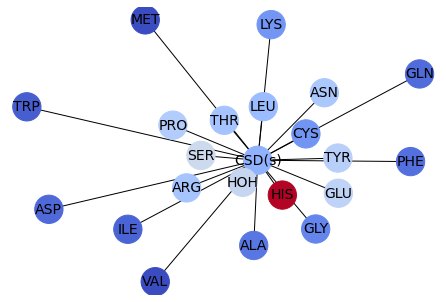

In [234]:
### Network Plot assigning color according to 

import matplotlib.pyplot as plt
import networkx as nx
import xlrd
import xml.etree.ElementTree as ET

file="./Book2_python_NetworkSG.xlsx"

book=xlrd.open_workbook(file)
G = nx.Graph()

names=[]

sheet = book.sheet_by_index(1) ### 0-->CYS 1-->CSD 2-->CSO 3-->OCS 

for row in range(sheet.nrows):
    data = sheet.row_slice(row)
    Amino1 = data[0].value
    CYS = data[1].value
    NeighborCYS= data[2].value
    gain_lost=data[3].value

    G.add_node(Amino1, neighbor=NeighborCYS, distance=gain_lost)
    names.append((Amino1, CYS, {'weight': NeighborCYS}))
    
color_map = nx.get_node_attributes(G, "distance")

distance_colors =[color_map.get(node) for node in G.nodes()]

G.add_edges_from(names)

nx.draw(G, with_labels='True', node_color=distance_colors, cmap = 'coolwarm', font_size=14, node_size=800)
#plt.show()
#plt.savefig('./CSD_neighborsSG2.png', dpi=200)    